In [1]:
import numpy as np
import cv2
import glob
import random
import pandas as pd
from random import random
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import math
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# store path in var
face_path = '/Users/srini/Desktop/Computer_Vision/Proj3/FaceData/Pos/'
n_face_path = '/Users/srini/Desktop/Computer_Vision/Proj3/FaceData/Neg'

# reading images from the folder
def im_read_dir(path):
    list_images = []
    for imagepath in glob.glob(path+'/*.jpg'):
        image = cv2.imread(imagepath,0)
        image = image/255
        list_images.append(image.astype(np.float32))
        if len(list_images) == 2000:
            break
    return list_images

face_list = im_read_dir(face_path)
n_face_list = im_read_dir(n_face_path)

face_y = [1]*1600
n_face_y = [0]*1600
labels = face_y + n_face_y
f_data_train = face_list[:1600]
nf_data_train = n_face_list[:1600]
data = f_data_train + nf_data_train
data = np.asarray(data)
t_data = face_list[1600:] + n_face_list[1600:]
t_data = np.asarray(t_data)
t_labels = [1]*400 + [0]*400
category_ct = 2
(xTrain, xVal, yTrain, yVal) = train_test_split(data,labels, test_size=0.15)
yTrain = to_categorical(yTrain, category_ct)
yVal = to_categorical(yVal, category_ct)

In [3]:
# Data Augmentation
width_shift = 3/32
height_shift = 3/32
flip = True
data_aug = ImageDataGenerator(horizontal_flip=flip,
                             rotation_range=35, width_shift_range=0.1,height_shift_range=0.1,
                             zoom_range=0.3,shear_range=0.1, fill_mode="reflect")

In [7]:
# Data Normalization
xTrain -= np.mean(xTrain)
xVal -= np.mean(xVal)
xTrain /= np.std(xTrain, axis = 0)
xVal /= np.std(xVal, axis = 0)

# initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=0.1, seed=None)
initializer = tf.keras.initializers.GlorotNormal(seed=None)
# initializer = tf.keras.initializers.HeNormal(seed=None)
# initializer = tf.keras.initializers.Zeros()
class LeNet:
    def build(width, height, depth,category_ct, reg,lr):
        model = Sequential()
        inputShape = (height, width, depth)
        model.add(Conv2D(6, kernel_initializer=initializer,kernel_size=(5, 5), strides= (1,1), padding="same",input_shape=inputShape))
#         model.add(Activation("relu"))
        model.add(Activation("LeakyReLU")) 
#         model.add(Activation("tanh")) 
        model.add(AveragePooling2D(pool_size=(2, 2),strides= (2,2)))   
        model.add(Conv2D(16,kernel_initializer=initializer,kernel_size= (5, 5), strides= (1,1), padding="valid",input_shape=inputShape))
#         model.add(Activation("relu"))
        model.add(Activation("LeakyReLU")) 
#         model.add(Activation("tanh")) 
        model.add(AveragePooling2D(pool_size=(2, 2),strides= (2,2)))
        model.add(Flatten())
#         model.add(Dense(120, activation='relu',activity_regularizer=regularizers.l2(0)))
#         model.add(Dense(84, activation='relu',activity_regularizer=regularizers.l2(0)))
        model.add(Dense(120, activation='LeakyReLU',activity_regularizer=regularizers.l2(reg)))
        model.add(Dense(84, activation='LeakyReLU',activity_regularizer=regularizers.l2(reg)))
#         model.add(Dense(120, activation='tanh',activity_regularizer=regularizers.l2(0)))
#         model.add(Dense(84, activation='tanh',activity_regularizer=regularizers.l2(0)))
        model.add(BatchNormalization())
        model.add(Dense(category_ct,activation = 'softmax'))
        model.compile(loss=categorical_crossentropy,metrics=['accuracy'], optimizer= tf.keras.optimizers.SGD(learning_rate=lr))
#         model.compile(loss=categorical_crossentropy,metrics=['accuracy'], optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.01))
#         model.compile(loss=categorical_crossentropy,metrics=['accuracy'], optimizer= tf.keras.optimizers.Adam(learning_rate=0.01))
        return model


ep = 14

#  Search

# for ct in range(2,5):
#     for iterr in range (0,10):
#         keras.backend.clear_session()
#         reg = random()*pow(10,np.random.randint(-5,0))
#         lr = random()*pow(10,-ct)
#         print("learning rate:",lr,"reg",reg)
#         model = LeNet.build(20,20,1,2,reg,lr)
#         model.fit(xTrain, yTrain,validation_data=(xVal, yVal),epochs=ep, verbose=1)
#         iterr = iterr+1


model = LeNet.build(20,20,1, category_ct,0.0214,0.0087)
trained_model = model.fit(xTrain, yTrain,validation_data=(xVal, yVal),epochs=ep, verbose=1,batch_size=64)

# With Data Augmentation
# data_aug.fit(xTrain.reshape(2720, 20, 20, 1))
# trained_model_aug = model.fit(data_aug.flow(xTrain.reshape(2720, 20, 20, 1), yTrain, batch_size=32),
#                               validation_data=(xVal, yVal),epochs=ep, verbose=1)


Epoch 1/14
43/43 [==============================] - 1s 9ms/step - loss: 0.4442 - accuracy: 0.8096 - val_loss: 0.6629 - val_accuracy: 0.7563
Epoch 2/14
43/43 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.8636 - val_loss: 0.6345 - val_accuracy: 0.8500
Epoch 3/14
43/43 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.8875 - val_loss: 0.6089 - val_accuracy: 0.8708
Epoch 4/14
43/43 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.9011 - val_loss: 0.5739 - val_accuracy: 0.8833
Epoch 5/14
43/43 [==============================] - 0s 7ms/step - loss: 0.2492 - accuracy: 0.9107 - val_loss: 0.5481 - val_accuracy: 0.8875
Epoch 6/14
43/43 [==============================] - 0s 6ms/step - loss: 0.2374 - accuracy: 0.9140 - val_loss: 0.5100 - val_accuracy: 0.8667
Epoch 7/14
43/43 [==============================] - 0s 6ms/step - loss: 0.2245 - accuracy: 0.9217 - val_loss: 0.4655 - val_accuracy: 0.8833
Epoch 8/14
43/43 [==

In [8]:
t_data -= np.mean(t_data)
t_data /= np.std(t_data, axis = 0)

y_predicted = []
op=[0]*len(t_data)
ct=0
for i in t_data:
    i = np.expand_dims(i, axis=0)
    pr = model.predict(i)[0]
    pred=int(np.argmax(pr))
    y_predicted.append(pred)
    ct+=1    
    
ct1 = 0
for i in range (0,len(t_labels),1):
    if y_predicted[i] == t_labels[i]:
        ct1 +=1

y_true = t_labels
target_names = ['Face', 'Non_Face']
print(classification_report(y_true, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

        Face       0.89      0.93      0.91       400
    Non_Face       0.92      0.89      0.90       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



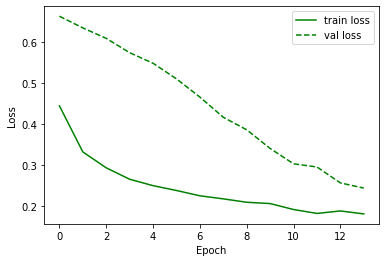

In [9]:
fig = plt.figure()

plt.plot(trained_model.history['loss'],
         label='train loss',
         c='green', ls='-')
plt.plot(trained_model.history['val_loss'],
         label='val loss',
         c='green',ls='--')

# plt.plot(trained_model_aug.history['loss'],
#          label='train loss aug',
#          c='blue', ls='-')
# plt.plot(trained_model_aug.history['val_loss'],
#          label='val loss aug',
#          c='blue',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()